In [26]:
import sys
sys.path.insert(0, '../src/')

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy.sparse as sp
from scipy.sparse import load_npz

import torch

from matplotlib import pyplot as plt
%matplotlib inline

import utils

In [76]:
_A_obs = load_npz('../data/datasets/CORA_ML.npz')

In [77]:
val_share = 0.1
test_share = 0.05
seed = 481516234

train_ones, val_ones, val_zeros, test_ones, test_zeros = utils.train_val_test_split_adjacency(_A_obs, val_share, test_share, seed, undirected=True, connected=True, asserts=False)

train_graph = sp.csr_matrix((np.ones(len(train_ones)),(train_ones[:,0], train_ones[:,1])))
assert (train_graph.toarray() == train_graph.toarray().T).all()

In [8]:
data = np.load('../logs/CORA-ML/Ours/Experiment_00/weights/weights_035.npz')

In [9]:
a, b = data

In [12]:
W_down = data[a]
W_up = data[b]

In [13]:
W = W_down @ W_up

In [66]:
W_up.shape

(12, 2810)

In [32]:
lmbds_W , _ = np.linalg.eig(W)

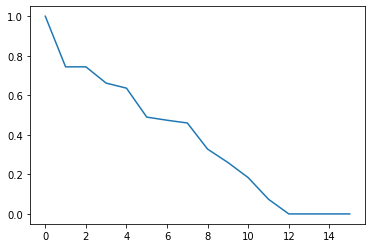

In [55]:
plt.plot(list(reversed(sorted(list(np.abs(lmbds_W.real/lmbds_W.max())))))[:16])

In [18]:
S = np.array(torch.softmax(torch.tensor(W), dim=-1))

In [34]:
lmbds_S , _ = np.linalg.eig(S)

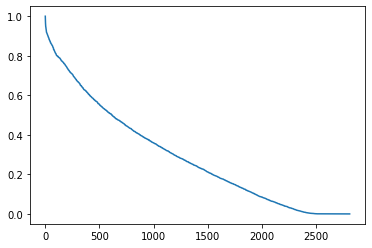

In [102]:
plt.plot(list(reversed(sorted(list(np.abs(lmbds_S))))))

In [78]:
A = train_graph.toarray()

In [79]:
degrees = A.sum(axis=-1, keepdims=True)

In [81]:
P = 1/degrees * A

In [82]:
lmbds_P , _ = np.linalg.eig(P)

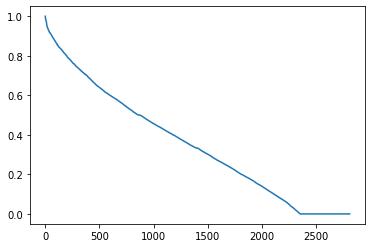

In [103]:
plt.plot(list(reversed(sorted(list(np.abs(lmbds_P)/lmbds_P.max())))))

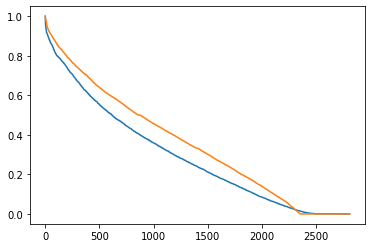

In [98]:
plt.plot(list(reversed(sorted(np.abs(lmbds_S)))))
plt.plot(list(reversed(sorted(np.abs(lmbds_P)))))

In [85]:
len(lmbds_P)

2810

In [86]:
len(lmbds_S)

2810

In [62]:
P.shape

(2110, 2110)

In [63]:
train_graph.shape

(2110, 2110)

In [64]:
W.shape

(2810, 2810)